Plot twist! The expert who priced these gems has now vanished. Francesco needs you to be the new diamond evaluator. He's looking for a model that predicts a gem's worth based on its characteristics. And, because Francesco's clientele is as demanding as he is, he wants the why behind every price tag.

Create a Jupyter notebook where you develop and evaluate your model.

In [836]:
# First load the dataset diamonds.csv
import pandas as pd

df = pd.read_csv('datasets/diamonds/diamonds.csv')

print(df.shape)

(5000, 10)


In [837]:
features = df.columns.tolist()

for f in df.columns:
    print(df[f].dtype)
    
# by looking at the values (only 10 features) we can see numerical and categorical features
numeric_features = ["carat", "depth", "table", "price", "x", "y", "z"]
cat_features = ["cut", "color", "clarity"]

float64
object
object
object
float64
float64
int64
float64
float64
float64


In [838]:
# convert data types to "unsigned" to speed up the analysis

for column in numeric_features:
    if df[column].min() >= 0:
        df[column] = pd.to_numeric(df[column], downcast='unsigned')

# eda, see if data makes sense

In [839]:
df.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


In [840]:
"""
From the data description we have to guarantee some requirements:
- all numerical data should be > 0 since we are dealing with a diamond
"""

to_drop = df.index[(df["price"] <= 0) | (df["carat"] <= 0) | (df["depth"] <= 0) | (df["table"] <= 0) | (df["x"] <= 0) | (df["y"] <= 0) | (df["z"] <= 0)].tolist()

# remove instances that are not consistent
df = df.drop(to_drop, axis=0)

df.describe()

,carat,depth,table,price,x,y,z
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,61.710844,57.446242,3930.581880,5.726232,5.728821,3.533678
std,0.467981,1.445563,2.259752,3970.923311,1.116257,1.109167,0.688437
min,0.230000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5376.000000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


# outlier detection

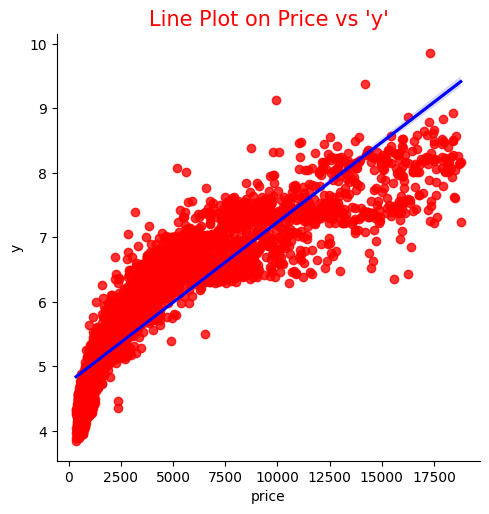

In [841]:
import seaborn as sns
import matplotlib.pyplot as plt

lm = sns.lmplot(x="price", y="y", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'y'", color="red", fontsize = 15)
plt.show()

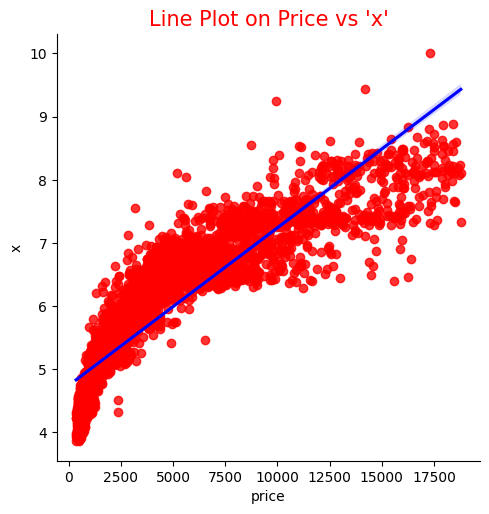

In [842]:
lm = sns.lmplot(x="price", y="x", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'x'", color="red", fontsize = 15)
plt.show()

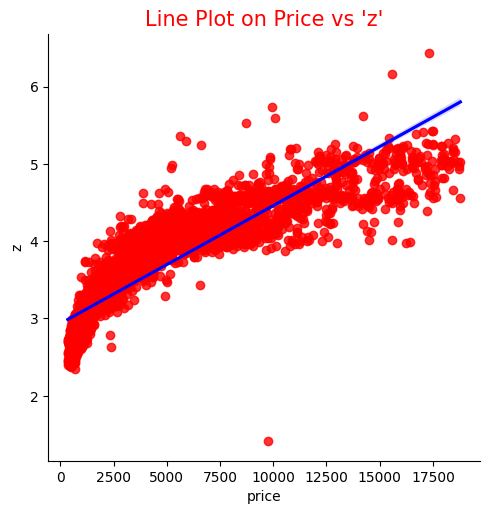

In [843]:
lm = sns.lmplot(x="price", y="z", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'z'", color="red", fontsize = 15)
plt.show()

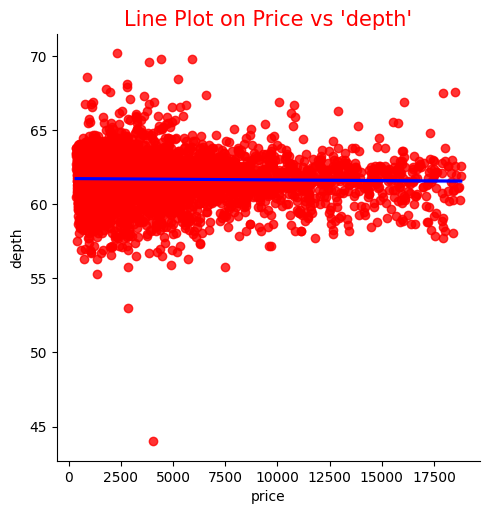

In [844]:
lm = sns.lmplot(x="price", y="depth", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'depth'", color="red", fontsize = 15)
plt.show()

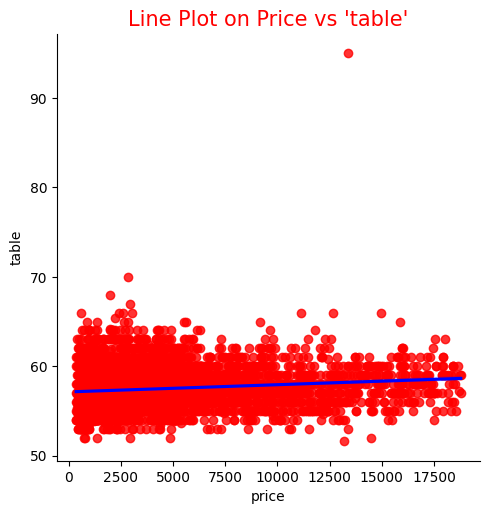

In [845]:
lm = sns.lmplot(x="price", y="table", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'table'", color="red", fontsize = 15)
plt.show()

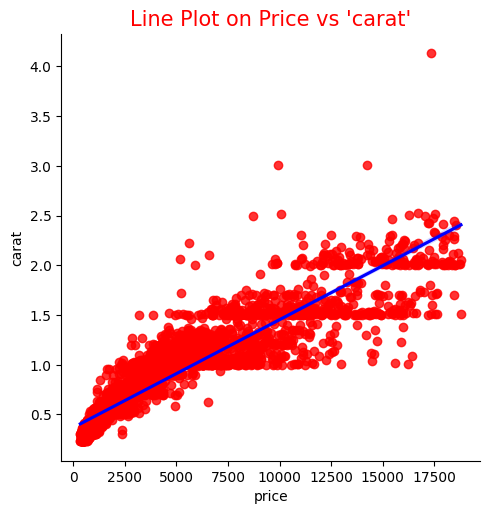

In [846]:
lm = sns.lmplot(x="price", y="carat", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'carat'", color="red", fontsize = 15)
plt.show()

Since we have a relatively small dataset and not so many outliers, we can actually look at the instances and evaluate if they are actual outliers, or we can keep them. Also, we don't have many samples, so we try to keep as much as we can.

In [847]:
high_carat = pd.DataFrame(columns=df.columns)
high_table = pd.DataFrame(columns=df.columns)
low_depth = pd.DataFrame(columns=df.columns)
low_z = pd.DataFrame(columns=df.columns)

for index, row in df.iterrows():
    if row["table"] > 90:
        high_table = pd.concat([high_table, pd.DataFrame(row).T], ignore_index=True)
    if row["carat"] > 4:
        high_carat = pd.concat([high_carat, pd.DataFrame(row).T], ignore_index=True)
    if row["depth"] < 45:
        low_depth = pd.concat([low_depth, pd.DataFrame(row).T], ignore_index=True)
    if row["z"] < 2:
        low_z = pd.concat([low_z, pd.DataFrame(row).T], ignore_index=True)

In [848]:
# if we look at the values we see high carat but very bad clarity (I1), below average cut (fair) and decent size. We do not classify it as an outlier. Very bad clarity mitigates the high carat.

high_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
0,4.13,Fair,H,I1,64.8,61.0,17329,10.0,9.85,6.43


In [849]:
# table is the percentage of "table width" compared to its overall size x. It's possible for it to be just a natural anomaly. However, it's very far compared to the norm we observe, so it's probably wise to eliminate it.

high_table

,carat,cut,color,clarity,depth,table,price,x,y,z
0,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [850]:
# same with this, we remove it

low_depth

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12


In [851]:
# we also remove this

low_z

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41


In [852]:
for index, row in df.iterrows():
    if row["table"] > 90 or row["depth"] < 45 or row["z"] < 2:
        df.drop(index)

# processing

In [853]:
from sklearn.preprocessing import LabelEncoder
import copy

df_proc = copy.deepcopy(df)

le = LabelEncoder()

for col in cat_features:
    df_proc[col] = le.fit_transform(df_proc[col])
    
df_proc

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,2,4,3,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,2,4,2,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,3,5,2,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,2,2,2,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,4,2,5,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,2,4,7,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,3,3,7,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,2,6,7,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,3,2,5,62.9,58.0,802,4.31,4.27,2.70


<Axes: >

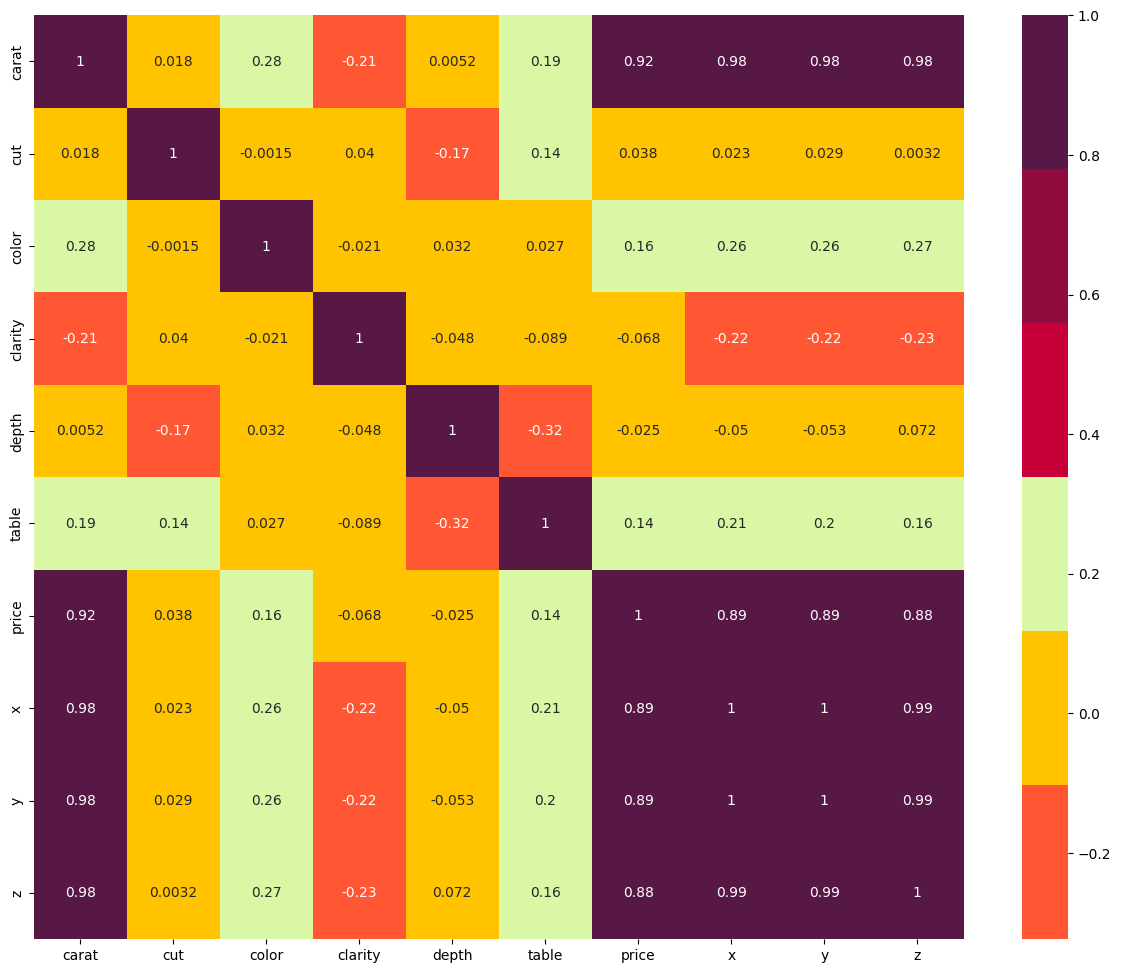

In [854]:
cols = ["#FF5733", "#FFC300", "#DAF7A6", "#C70039", "#900C3F", "#581845"]

corrmat = df_proc.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, cmap=cols, annot=True)

We can see that price (our target variable) is highly correlated with carat, x, y, z. On the other hand, "cut," "color," "clarity," "depth" and "table" aren't as important. We could remove them. But we already have very few features, so we'll see if the model does not work very well we can remove the extra features.

# model building

In [855]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

targets = df_proc["price"]

x_train, x_test, y_train, y_test = train_test_split(df_proc, targets, test_size=0.20)
df_proc.drop("price", axis=1)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.10,2,4,3,62.0,55.0,6.61,6.65,4.11
1,1.29,2,4,2,62.6,56.0,6.96,6.93,4.35
2,1.20,3,5,2,61.1,58.0,6.88,6.80,4.18
3,1.50,2,2,2,60.9,56.0,7.43,7.36,4.50
4,0.90,4,2,5,61.7,57.0,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...
4995,0.38,2,4,7,62.3,53.3,4.65,4.69,2.91
4996,0.33,3,3,7,61.3,59.0,4.45,4.42,2.72
4997,1.25,2,6,7,62.1,56.0,6.81,6.84,4.24
4998,0.31,3,2,5,62.9,58.0,4.31,4.27,2.70


In [856]:
# we can try a few pipelines

from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

p1 = Pipeline([("scaler", StandardScaler()), ("xgboost", XGBRegressor())])
p2 = Pipeline([("scaler", StandardScaler()), ("rf", RandomForestRegressor())])

pipes = [p1, p2]

for p in pipes:
    p.fit(x_train, y_train)

# evaluation

In [859]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

for p in pipes:
    predicted = p.predict(x_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, predicted)
    
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, predicted)
    r2 = metrics.r2_score(y_test, predicted)
    
    print("Pipeline: ", p.steps[1])
    
    print("R^2:", r2)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    
    print("\n\n")


Pipeline:  ('xgboost', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...))
R^2: 0.9998637102792088
Mean Squared Error: 2017.4363101058525
Mean Absolute Error: 21.472682792342496



Pipeline:  ('rf', RandomForestRegressor())
R^2: 0.9999964280229892
Mean Squared Error: 52.874391983968366
Mean Absolute Err